<a href="https://colab.research.google.com/github/hyunj941031/hyunjoon/blob/main/game_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload();

Saving vgames2.csv to vgames2.csv


# 데이터 탐색

In [3]:
df = pd.read_csv('vgames2.csv')

# 파일 내의 index 컬럼 제거
df = df.drop(df.columns[0], axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
# 결측값이 전체 데이터에 비해 적은 개수(2% 내외)이므로 결측값 제거
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [6]:
# index 재정렬
df = df.reset_index(drop=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [7]:
# 중복 데이터 확인
df.duplicated().sum()

0

In [8]:
df.shape

(16241, 9)

In [9]:
pd.set_option('display.max_rows', None)

# 데이터 정제

## 각 컬럼 별 변수 분포 확인

In [10]:
df['Platform'].value_counts()

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
df['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [12]:
df['Publisher'].value_counts()

Electronic Arts                           1332
Activision                                 963
Namco Bandai Games                         924
Ubisoft                                    913
Konami Digital Entertainment               821
THQ                                        711
Nintendo                                   692
Sony Computer Entertainment                679
Sega                                       631
Take-Two Interactive                       411
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                230
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          195
Midway Games                               195
505 Games                                  191
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher  

In [13]:
df['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
2006.0     998
2005.0     930
2002.0     823
2003.0     767
2004.0     736
2012.0     650
2015.0     606
2014.0     578
2013.0     543
2001.0     478
1998.0     374
2000.0     345
2016.0     337
1999.0     336
1997.0     287
1996.0     259
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
11.0        10
9.0         10
8.0         10
1980.0       8
10.0         7
3.0          7
6.0          7
16.0         5
15.0         5
5.0          4
4.0          4
95.0         4
98.0         3
7.0          3
96.0         3
2017.0       3
2.0          3
0.0          3
14.0         2
1.0          2
97.0         2
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, dtype: int64

## 판매량(Sales) 변수값 정리

In [14]:
df_clean = df.copy()

df_clean['NA_Sales_Num'] = df_clean.NA_Sales.str.extract(r'([^a-zA-Z]+)').astype('float')
df_clean['NA_Sales_size'] = df_clean.NA_Sales.str.extract(r'([a-zA-Z])')

df_clean['EU_Sales_Num'] = df_clean.EU_Sales.str.extract(r'([^a-zA-Z]+)').astype('float')
df_clean['EU_Sales_size'] = df_clean.EU_Sales.str.extract(r'([a-zA-Z])')

df_clean['JP_Sales_Num'] = df_clean.JP_Sales.str.extract(r'([^a-zA-Z]+)').astype('float')
df_clean['JP_Sales_size'] = df_clean.JP_Sales.str.extract(r'([a-zA-Z])')

df_clean['Other_Sales_Num'] = df_clean.Other_Sales.str.extract(r'([^a-zA-Z]+)').astype('float')
df_clean['Other_Sales_size'] = df_clean.Other_Sales.str.extract(r'([a-zA-Z])')

df_clean = df_clean.drop('NA_Sales', axis=1)
df_clean = df_clean.drop('EU_Sales', axis=1)
df_clean = df_clean.drop('JP_Sales', axis=1)
df_clean = df_clean.drop('Other_Sales', axis=1)

df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales_Num,NA_Sales_size,EU_Sales_Num,EU_Sales_size,JP_Sales_Num,JP_Sales_size,Other_Sales_Num,Other_Sales_size
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,NaN,0.00,NaN,0.00,NaN,0.00,NaN
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,NaN,0.00,NaN,0.00,NaN,0.01,NaN
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,NaN,0.00,NaN,0.02,NaN,0.00,NaN
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,NaN,0.00,NaN,0.00,NaN,0.00,NaN
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,NaN,0.09,NaN,0.00,NaN,0.04,NaN


## Platform, Genre, Publisher 카테고리화

In [15]:
df_clean['Platform'] = df_clean['Platform'].astype('category')
df_clean['Genre'] = df_clean['Genre'].astype('category')
df_clean['Publisher'] = df_clean['Publisher'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16241 non-null  object  
 1   Platform          16241 non-null  category
 2   Year              16241 non-null  float64 
 3   Genre             16241 non-null  category
 4   Publisher         16241 non-null  category
 5   NA_Sales_Num      16241 non-null  float64 
 6   NA_Sales_size     191 non-null    object  
 7   EU_Sales_Num      16241 non-null  float64 
 8   EU_Sales_size     195 non-null    object  
 9   JP_Sales_Num      16241 non-null  float64 
 10  JP_Sales_size     196 non-null    object  
 11  Other_Sales_Num   16241 non-null  float64 
 12  Other_Sales_size  197 non-null    object  
dtypes: category(3), float64(5), object(5)
memory usage: 1.3+ MB


## Year 정수 변환 및 이상치 제거

In [16]:
df_clean['Year'] = df_clean['Year'].astype('int')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Name              16241 non-null  object  
 1   Platform          16241 non-null  category
 2   Year              16241 non-null  int64   
 3   Genre             16241 non-null  category
 4   Publisher         16241 non-null  category
 5   NA_Sales_Num      16241 non-null  float64 
 6   NA_Sales_size     191 non-null    object  
 7   EU_Sales_Num      16241 non-null  float64 
 8   EU_Sales_size     195 non-null    object  
 9   JP_Sales_Num      16241 non-null  float64 
 10  JP_Sales_size     196 non-null    object  
 11  Other_Sales_Num   16241 non-null  float64 
 12  Other_Sales_size  197 non-null    object  
dtypes: category(3), float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [17]:
df_clean = df_clean[df_clean.Year > 1000].reset_index(drop=True)
df_clean['Year'].value_counts()

2009    1418
2008    1413
2010    1246
2007    1192
2011    1123
2006     998
2005     930
2002     823
2003     767
2004     736
2012     650
2015     606
2014     578
2013     543
2001     478
1998     374
2000     345
2016     337
1999     336
1997     287
1996     259
1995     215
1994     120
1993      60
1981      46
1992      43
1991      41
1982      36
1986      20
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

## Sales 소수값 정리

In [18]:
# K와 M이 붙은 숫자 경향 파악
# K가 붙은 경우 숫자가 0 또는 10이상인 값임.
# 따라서 소수점의 경우는 단위가 M이라고 판단함.
df_clean[pd.notnull(df_clean['NA_Sales_size']) | pd.notnull(df_clean['EU_Sales_size']) 
        | pd.notnull(df_clean['JP_Sales_size']) | pd.notnull(df_clean['Other_Sales_size'])]

,Name,Platform,Year,Genre,Publisher,NA_Sales_Num,NA_Sales_size,EU_Sales_Num,EU_Sales_size,JP_Sales_Num,JP_Sales_size,Other_Sales_Num,Other_Sales_size
10,Ford Racing,PS,2001,Racing,Empire Interactive,480.00,K,0.33,M,0.00,K,0.06,NaN
35,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,0.30,NaN,0.03,M,0.04,NaN,0.03,NaN
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60.00,K,0.08,NaN,0.16,NaN,0.03,NaN
62,SD Gundam Force,GBA,2004,Shooter,Namco Bandai Games,0.01,NaN,0.00,NaN,0.00,NaN,0.00,M
71,Teenage Mutant Ninja Turtles,XB,2003,Action,Konami Digital Entertainment,0.22,NaN,0.06,NaN,0.00,NaN,0.01,M
85,Bugs Bunny: Lost in Time,PS,1999,Platform,Infogrames,0.22,NaN,0.15,NaN,0.00,K,0.03,NaN
86,Tom Clancy's Ghost Recon: Predator,PSP,2010,Shooter,Ubisoft,0.07,NaN,0.02,NaN,0.00,K,0.02,NaN
123,Rozen Maiden: Gebetgarten,PS2,2007,Fighting,Taito,0.00,NaN,0.00,K,0.01,NaN,0.00,NaN
133,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,0.04,NaN,50.00,K,0.04,NaN,0.02,NaN
140,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0.00,K,0.02,NaN,0.00,NaN,0.00,NaN


In [19]:
df_sales = df_clean.copy()

def X_sales(num):
    if num >= 10:
        X_num = num * 1000
    else:
        X_num = num * 1000000
    return X_num

df_sales['NA_Sales'] = df_sales.NA_Sales_Num.apply(X_sales).astype('int')
df_sales['EU_Sales'] = df_sales.EU_Sales_Num.apply(X_sales).astype('int')
df_sales['JP_Sales'] = df_sales.JP_Sales_Num.apply(X_sales).astype('int')
df_sales['Other_Sales'] = df_sales.Other_Sales_Num.apply(X_sales).astype('int')

df_sales = df_sales.drop('NA_Sales_Num', axis=1)
df_sales = df_sales.drop('NA_Sales_size', axis=1)
df_sales = df_sales.drop('EU_Sales_Num', axis=1)
df_sales = df_sales.drop('EU_Sales_size', axis=1)
df_sales = df_sales.drop('JP_Sales_Num', axis=1)
df_sales = df_sales.drop('JP_Sales_size', axis=1)
df_sales = df_sales.drop('Other_Sales_Num', axis=1)
df_sales = df_sales.drop('Other_Sales_size', axis=1)

df_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000


In [20]:
df_sales['Total'] = df_sales.apply(lambda row : row['NA_Sales'] + row['EU_Sales'] + row['JP_Sales']+ row['Other_Sales'], axis=1)
df_sales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000


In [21]:
df_clean.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales_Num',
       'NA_Sales_size', 'EU_Sales_Num', 'EU_Sales_size', 'JP_Sales_Num',
       'JP_Sales_size', 'Other_Sales_Num', 'Other_Sales_size'],
      dtype='object')

# 분석할만한 것들
    1. 플랫폼 별 호황 년도
    2. 플랫폼 별, 지역 별 판매량
    3. 장르 별 호황 년도
    4. 장르 별, 지역 별 판매량
    5. 제작사 별 호황년도
    6. 제작사 별, 지역 별 판매량
    7. 출고량이 높은 게임 분석
    8. 출고량이 낮은 게임 분석

## 1.플랫폼 별 호황 년도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


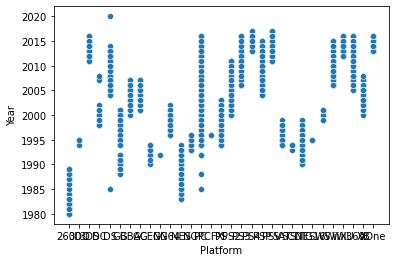

In [22]:
import seaborn as sns

sns.scatterplot(df_sales['Platform'], df_sales['Year'])

- Platform은 인기가 한 번 식으면 다시 오르기 힘듦.
- 따라서, 대략 2013년 이후의 Platform만을 시각화함.

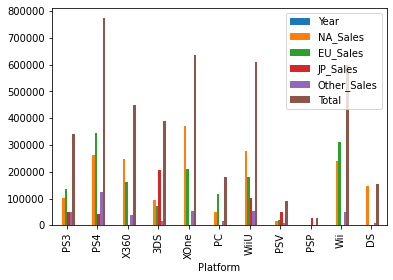

In [23]:
df_sales_recent = df_sales[df_sales.Year > 2013]
df_sales_recent.groupby(['Platform'], observed=True).mean().plot.bar();

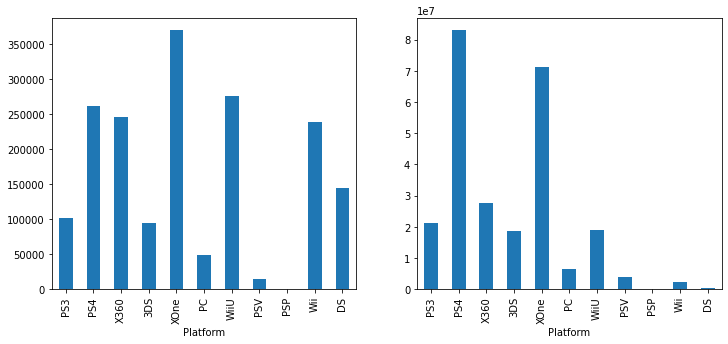

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['NA_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['NA_Sales'].sum().plot.bar();

### NA(북미)
- 평균랭킹(XOne, WiiU, PS4, X360, Wii)
- 총 랭킹(PS4, XOne, X360, PS3, WiiU)

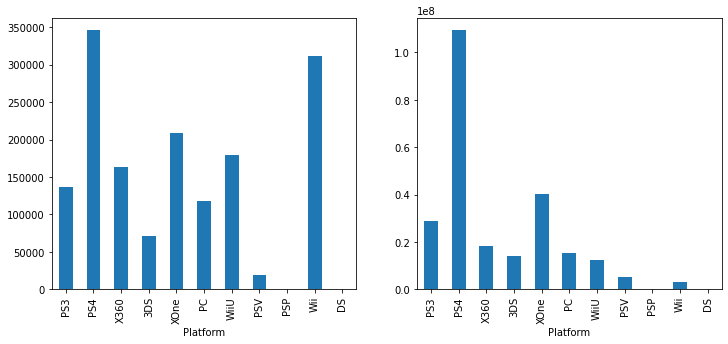

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['EU_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['EU_Sales'].sum().plot.bar();

### EU(유럽)
- 평균랭킹(PS4, Wii, XOne, WiiU, X360)
- 총 랭킹(PS4, XOne, PS3, X360, PC)

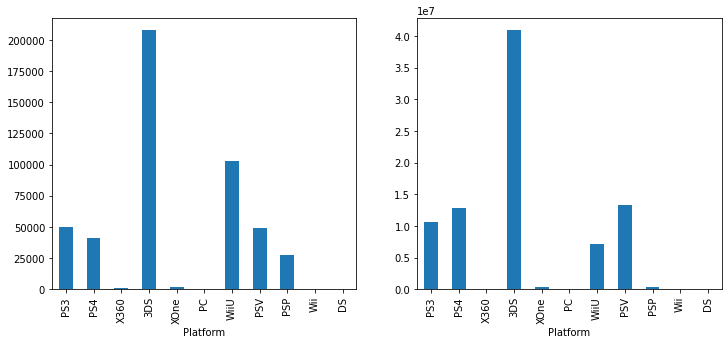

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['JP_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['JP_Sales'].sum().plot.bar();

### JP(일본)
- 평균랭킹(3DS, WiiU, PSV, PS3, PS4)
- 총 랭킹(3DS, PSV, PS4, PS3, WiiU)

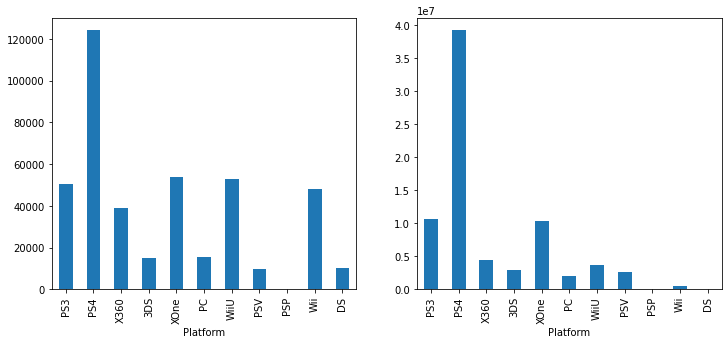

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['Other_Sales'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['Other_Sales'].sum().plot.bar();

### Other(나머지)
- 평균랭킹(PS4, XOne, WiiU, PS3, Wii)
- 총 랭킹(PS4, PS3, XOne, X360, WiiU)

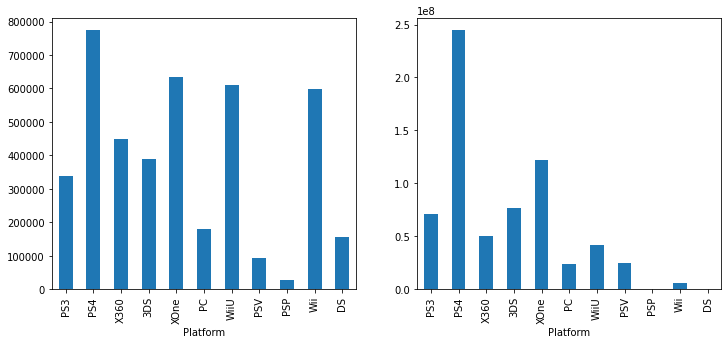

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df_sales_recent.groupby(['Platform'], observed=True)['Total'].mean().plot.bar();
plt.subplot(122)
df_sales_recent.groupby(['Platform'], observed=True)['Total'].sum().plot.bar();

### Total
- 평균랭킹(PS4, XOne, WiiU, Wii, X360)
- 총 랭킹(PS4, XOne, 3DS, PS3, X360)

### 총평
- 일본을 제외한 다른 나라의 Platform 취향이 비슷함.
- PS4, XOne, WiiU는 전 세계 3위권
- 일본에서는 특이하게 3DS와 PSV가 인기

In [29]:
bins = [1980, 2000, 2005, 2010, 2015, 2020]
labels = ['1900', '2000', '2005', '2010', '2015']

df_sales['Year_label'] = pd.cut(x=df_sales['Year'], bins=bins, labels=labels)

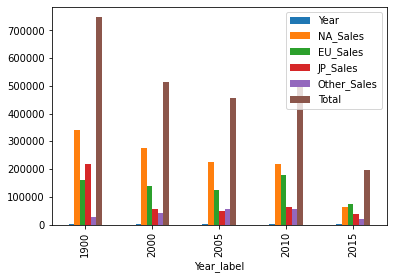

In [30]:
df_sales.groupby(['Year_label']).mean().plot.bar()

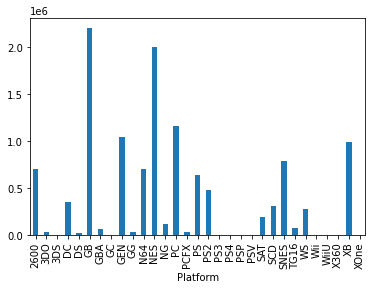

In [31]:
df_sales[df_sales['Year_label'] == '1900'].groupby(['Platform'])['Total'].mean().plot.bar()

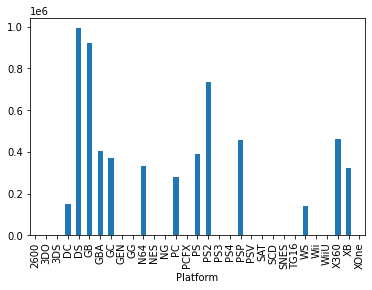

In [32]:
df_sales[df_sales['Year_label'] == '2000'].groupby(['Platform'])['Total'].mean().plot.bar()

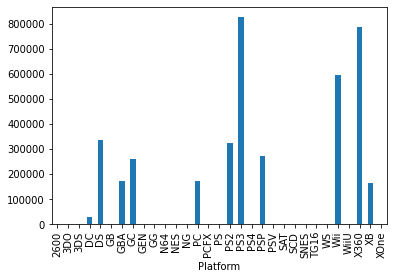

In [33]:
df_sales[df_sales['Year_label'] == '2005'].groupby(['Platform'])['Total'].mean().plot.bar()

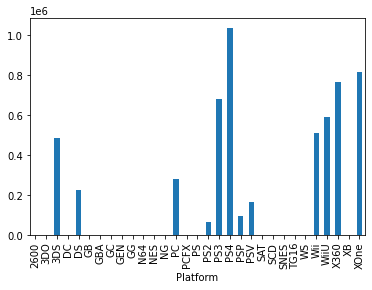

In [34]:
df_sales[df_sales['Year_label'] == '2010'].groupby(['Platform'])['Total'].mean().plot.bar()

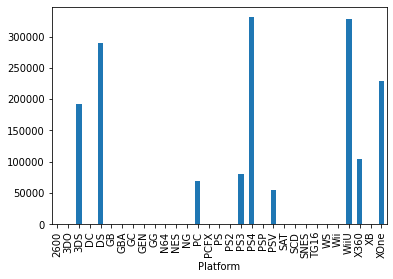

In [35]:
df_sales[df_sales['Year_label'] == '2015'].groupby(['Platform'])['Total'].mean().plot.bar()

## 2.플랫폼 별 지역 별 판매량

## 3.장르 별 호황년도

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


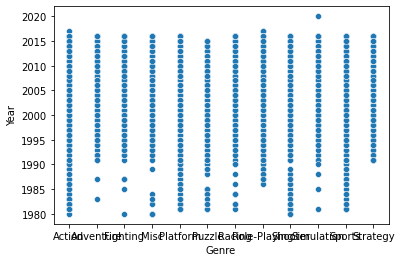

In [36]:
sns.scatterplot(df_sales['Genre'], df_sales['Year'])

## 4.장르 별, 지역 별 판매량

## 5.제작사 별 호황년도

## 6.제작사 별, 지역 별 판매량

## 7.출고량이 높은 게임 분석

## 8.출고량이 낮은 게임 분석